- Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [61]:
data1=pd.read_csv('50_Startups.csv')  

In [62]:
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [63]:
# droping State column
data1.drop(columns='State',inplace=True)
data1

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [64]:
# Renaming columns names
data1=data1.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'})
data1

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


#  EDA

## Missing Values


In [65]:
data=data1

In [66]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


<AxesSubplot:>

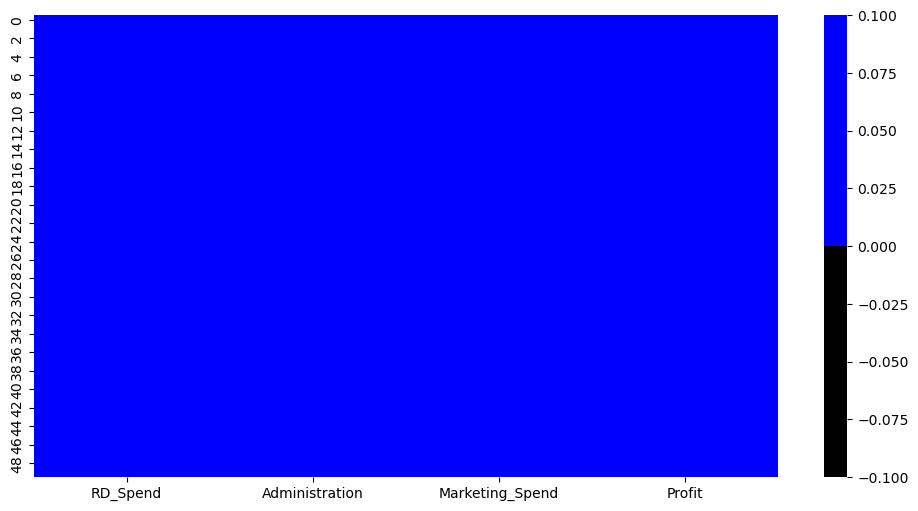

In [67]:
from matplotlib import pyplot as plt   
plt.figure(figsize=(12,6))

cols=data.columns
colors=['black','blue']

sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colors))

- Inference-Their are No Null values And datatypes are also given accuratly.

In [68]:
data.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


- Inference-It seems that their are some outliers in above Features,lets check by boxplot

##  Outlier detection

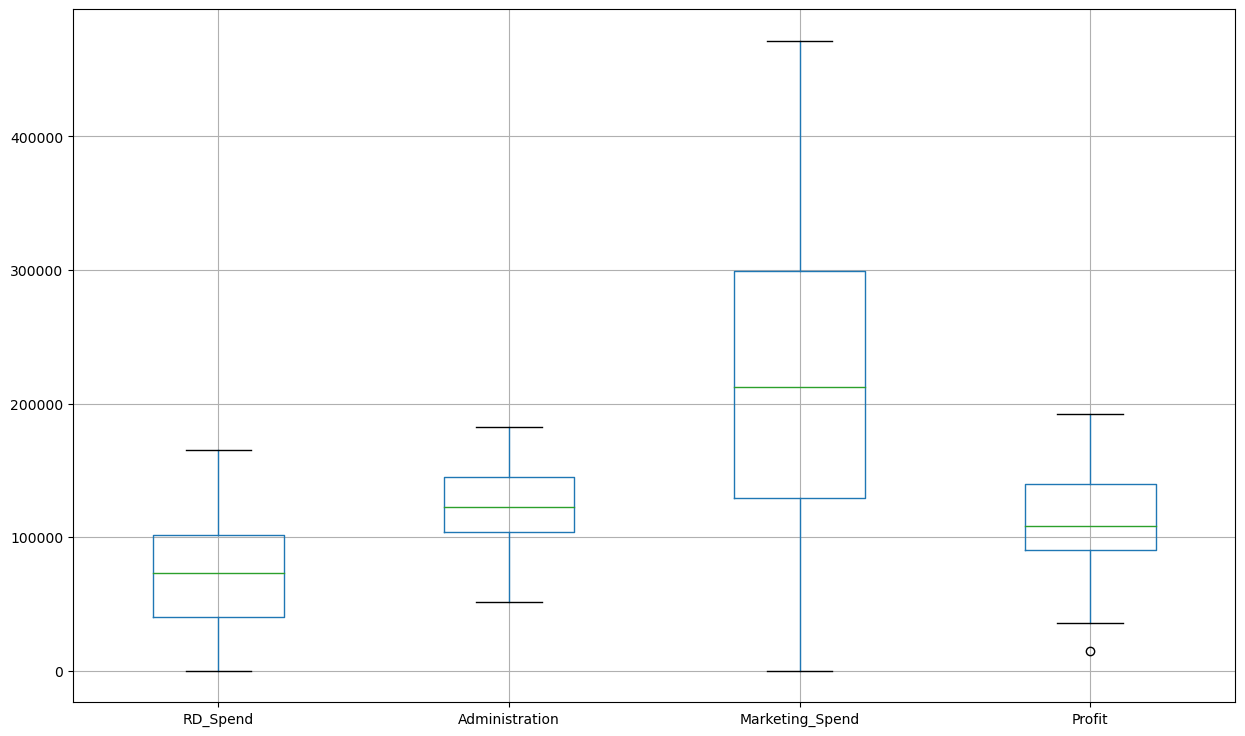

In [69]:
data.boxplot(figsize=(15,9));
plt.show()

- Inference= Thats unbelievable, No outliers in data and data also distributed normally.

In [70]:
data.skew()

RD_Spend           0.164002
Administration    -0.489025
Marketing_Spend   -0.046472
Profit             0.023291
dtype: float64

## Data Transformation

In [71]:
# Do Data Transformation,because of that model doesn't get biased.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)

In [72]:
data

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         2.01120333e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.99942997e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.98084225e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.77662724e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.35774012e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.12724963e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.10548055e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.09620987e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.00746967e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
         9.46022467e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01,
         8.54846746e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01,
      

In [73]:
# converting array into dataframe format

data_cleaned=pd.DataFrame(data,columns=['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit'])

In [74]:
data_cleaned

,RD_Spend,Administration,Marketing_Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740
5,1.279800,-0.776239,1.254210,1.127250
6,1.340066,0.932147,-0.688150,1.105481
7,1.245057,0.871980,0.932186,1.096210
8,1.030369,0.986952,0.830887,1.007470
9,1.091819,-0.456640,0.776107,0.946022


In [75]:
# drop duplicates rows

data_cleaned=data_cleaned.drop_duplicates()

In [76]:
data_cleaned.shape

(50, 4)

In [77]:
# before fitting model,lets check correlation between features
data_cleaned.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


- Inferences-Their are no correlation between feature and feature.
& maximum correlation between target(Profit) and feature (R&D spend,Marketing spend)

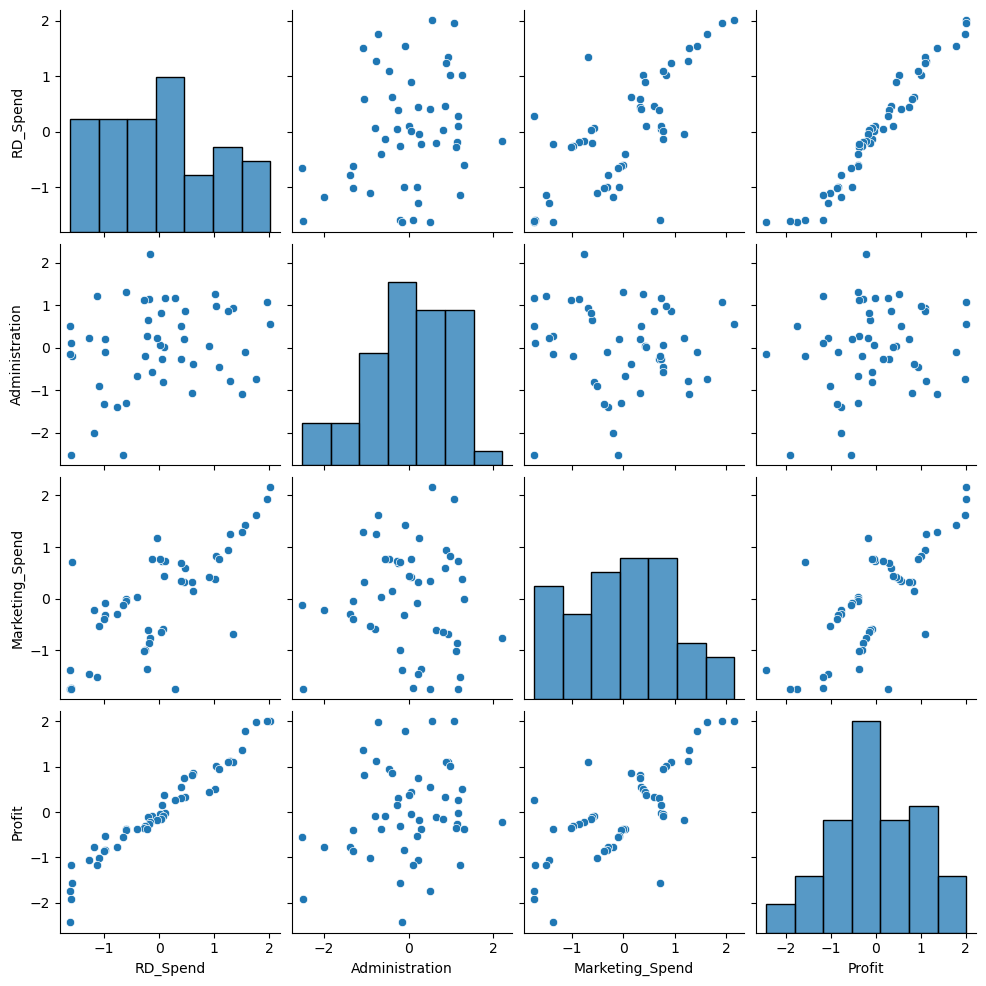

In [78]:
# lets check correlation by Visualization
sns.pairplot(data_cleaned)
plt.show();

- Inference= profit and R&D spend has 97% correlation

# Model building

In [79]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~ RD_Spend+Administration+Marketing_Spend',data=data_cleaned).fit()

In [80]:
# Finding Coefficient parameters
model.params

Intercept         -5.204170e-16
RD_Spend           9.175798e-01
Administration    -1.864043e-02
Marketing_Spend    8.261087e-02
dtype: float64

In [81]:
#t and p-Values
model.tvalues, np.round(model.pvalues,5)

(Intercept         -1.590412e-14
 RD_Spend           1.784637e+01
 Administration    -5.255068e-01
 Marketing_Spend    1.655077e+00
 dtype: float64,
 Intercept          1.00000
 RD_Spend           0.00000
 Administration     0.60176
 Marketing_Spend    0.10472
 dtype: float64)

- From above p value of Administration and Marketing feature are greater than 0.05

In [82]:
#R squared values

(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [83]:
# model accuracy is 95%

In [115]:
# Build SLR and MLR models for insignificant variables 'Administration' and 'Marketing'
# Also find their tvalues and pvalues

In [113]:
model_d=smf.ols('Profit~Marketing_Spend',data=data_cleaned).fit()
print(model_d.tvalues, '/n', model_d.pvalues)

Intercept         -5.430358e-15
Marketing_Spend    7.802657e+00
dtype: float64 /n Intercept          1.000000e+00
Marketing_Spend    4.381073e-10
dtype: float64


- Marketing departmnet feature has significant value

In [86]:
model_a=smf.ols('Profit~Administration',data=data_cleaned).fit()
print(model_a.tvalues, np.round(model_a.pvalues,5))

Intercept        -3.680455e-15
Administration    1.419493e+00
dtype: float64 Intercept         1.00000
Administration    0.16222
dtype: float64


- Administration departmnet feature has insignificant value

In [87]:
model_dm=smf.ols('Profit~Administration+Marketing_Spend',data=data_cleaned).fit()
print(model_dm.tvalues, np.round(model_dm.pvalues,5))

Intercept         -5.711023e-15
Administration     2.467779e+00
Marketing_Spend    8.281039e+00
dtype: float64 Intercept          1.00000
Administration     0.01729
Marketing_Spend    0.00000
dtype: float64


# Model Validation
Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [88]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq = smf.ols('RD_Spend~Administration+Marketing_Spend',data=data_cleaned).fit().rsquared
vif = 1/(1-rsq) 

rsq1 = smf.ols('Administration~RD_Spend+Marketing_Spend',data=data_cleaned).fit().rsquared
vif1 = 1/(1-rsq1) 

rsq2= smf.ols('Marketing_Spend~Administration+RD_Spend',data=data_cleaned).fit().rsquared
vif2 = 1/(1-rsq2) 

# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif,vif1,vif2]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


- None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis
Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

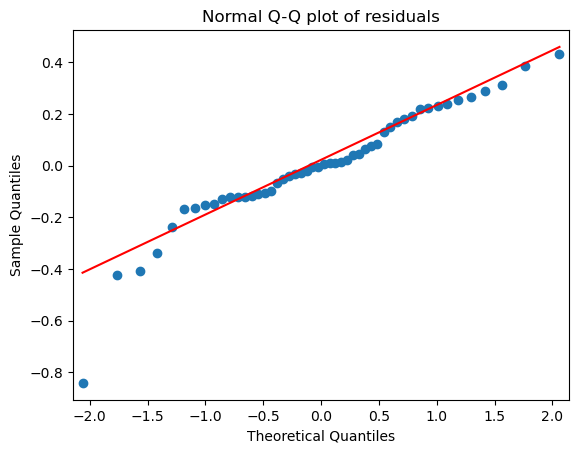

In [89]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [90]:
list(np.where(model.resid< -0.8)) 

[array([49], dtype=int64)]

In [91]:
 # Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  

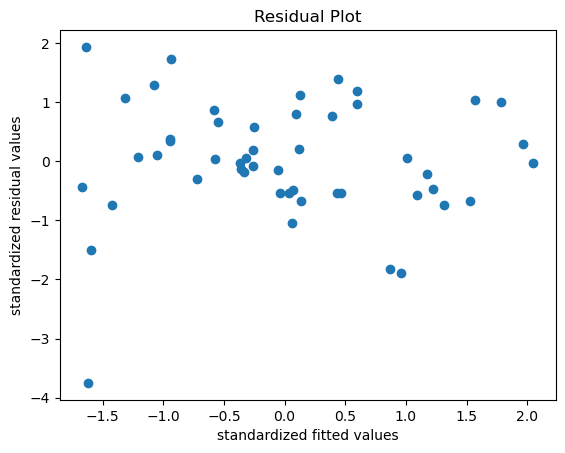

In [92]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [93]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)
## exog = x-variable & endog = y-variable

eval_env: 1


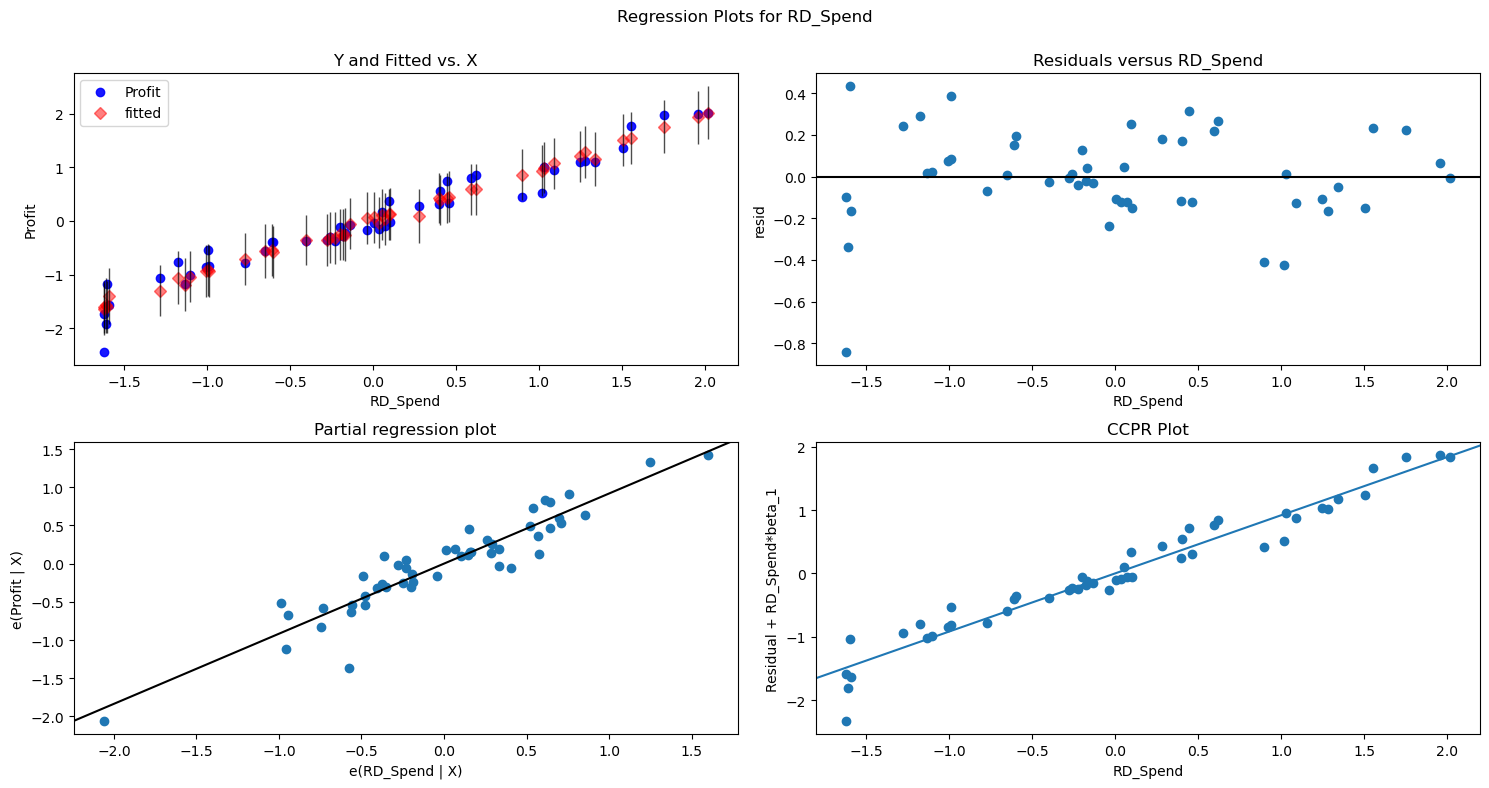

In [94]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD_Spend',fig=fig)
plt.show()

eval_env: 1


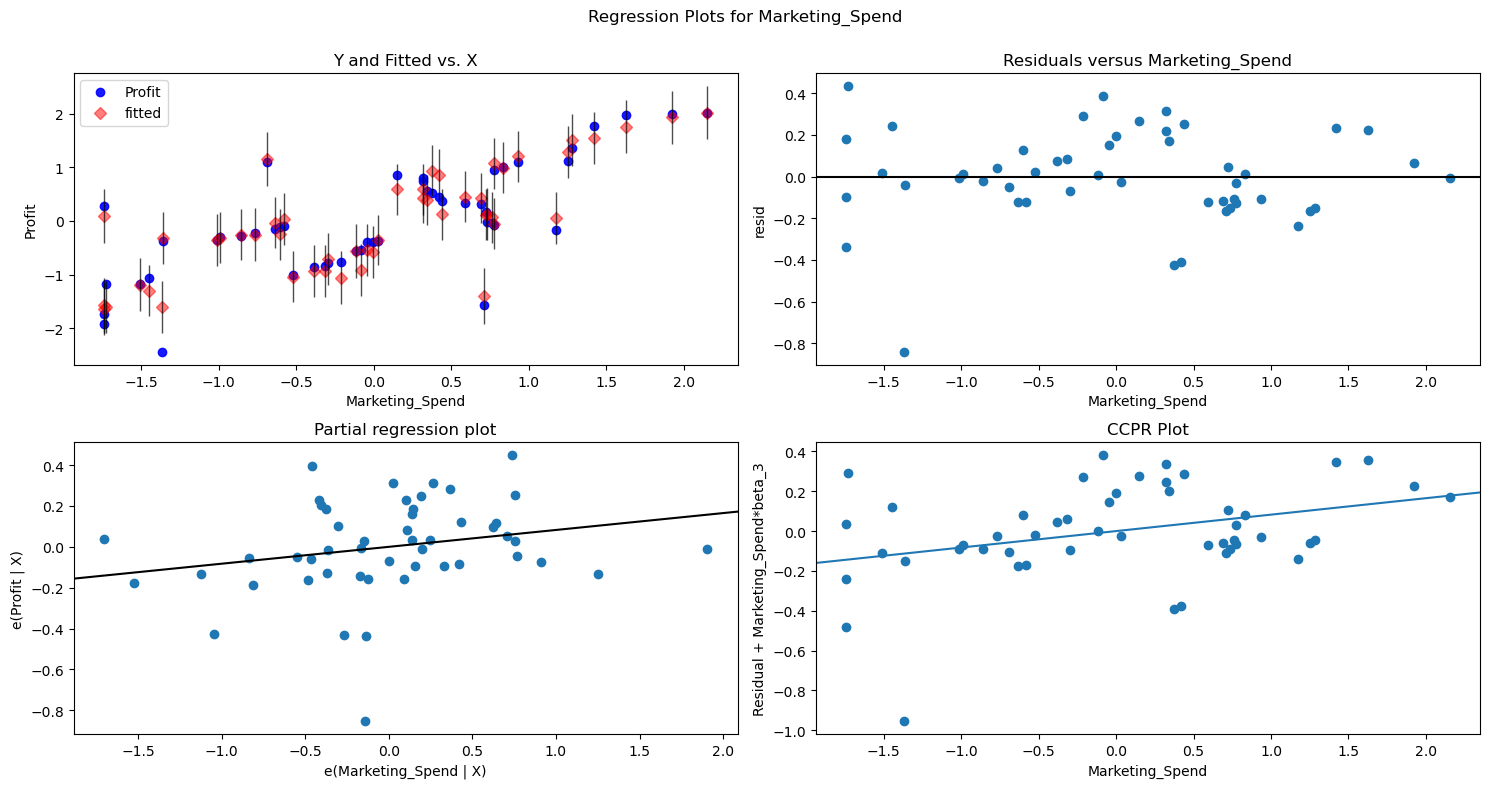

In [95]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

eval_env: 1


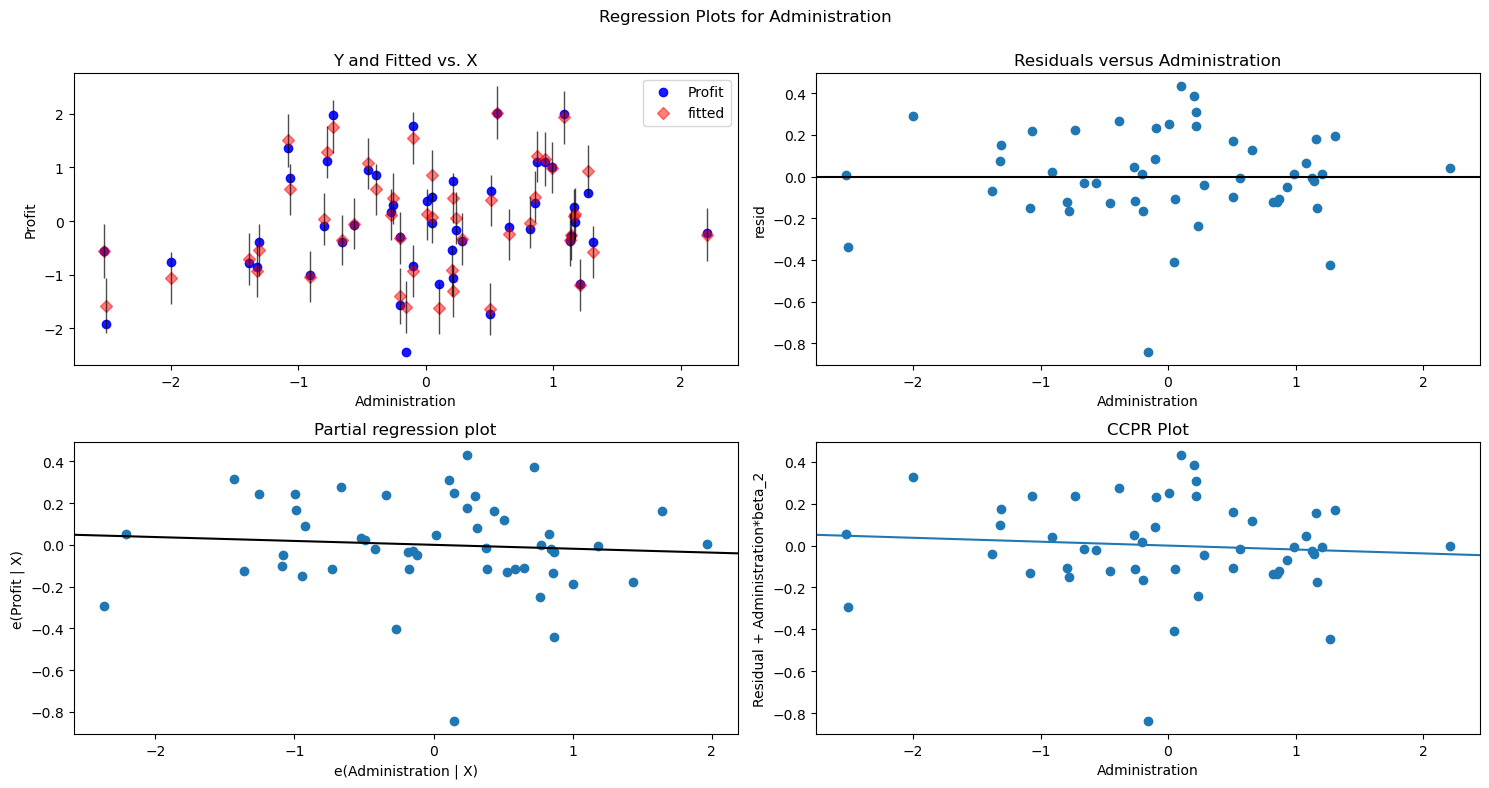

In [96]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

In [97]:
# Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

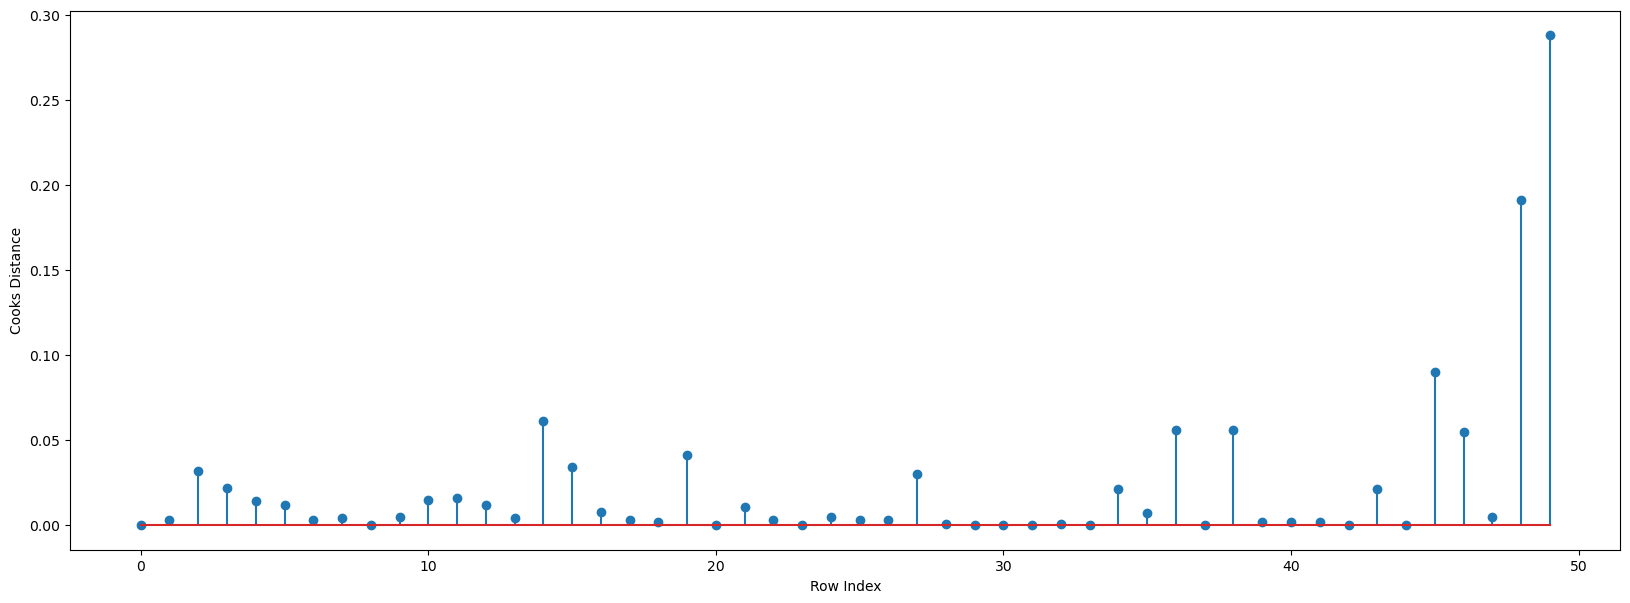

In [98]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data_cleaned)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [99]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432684)

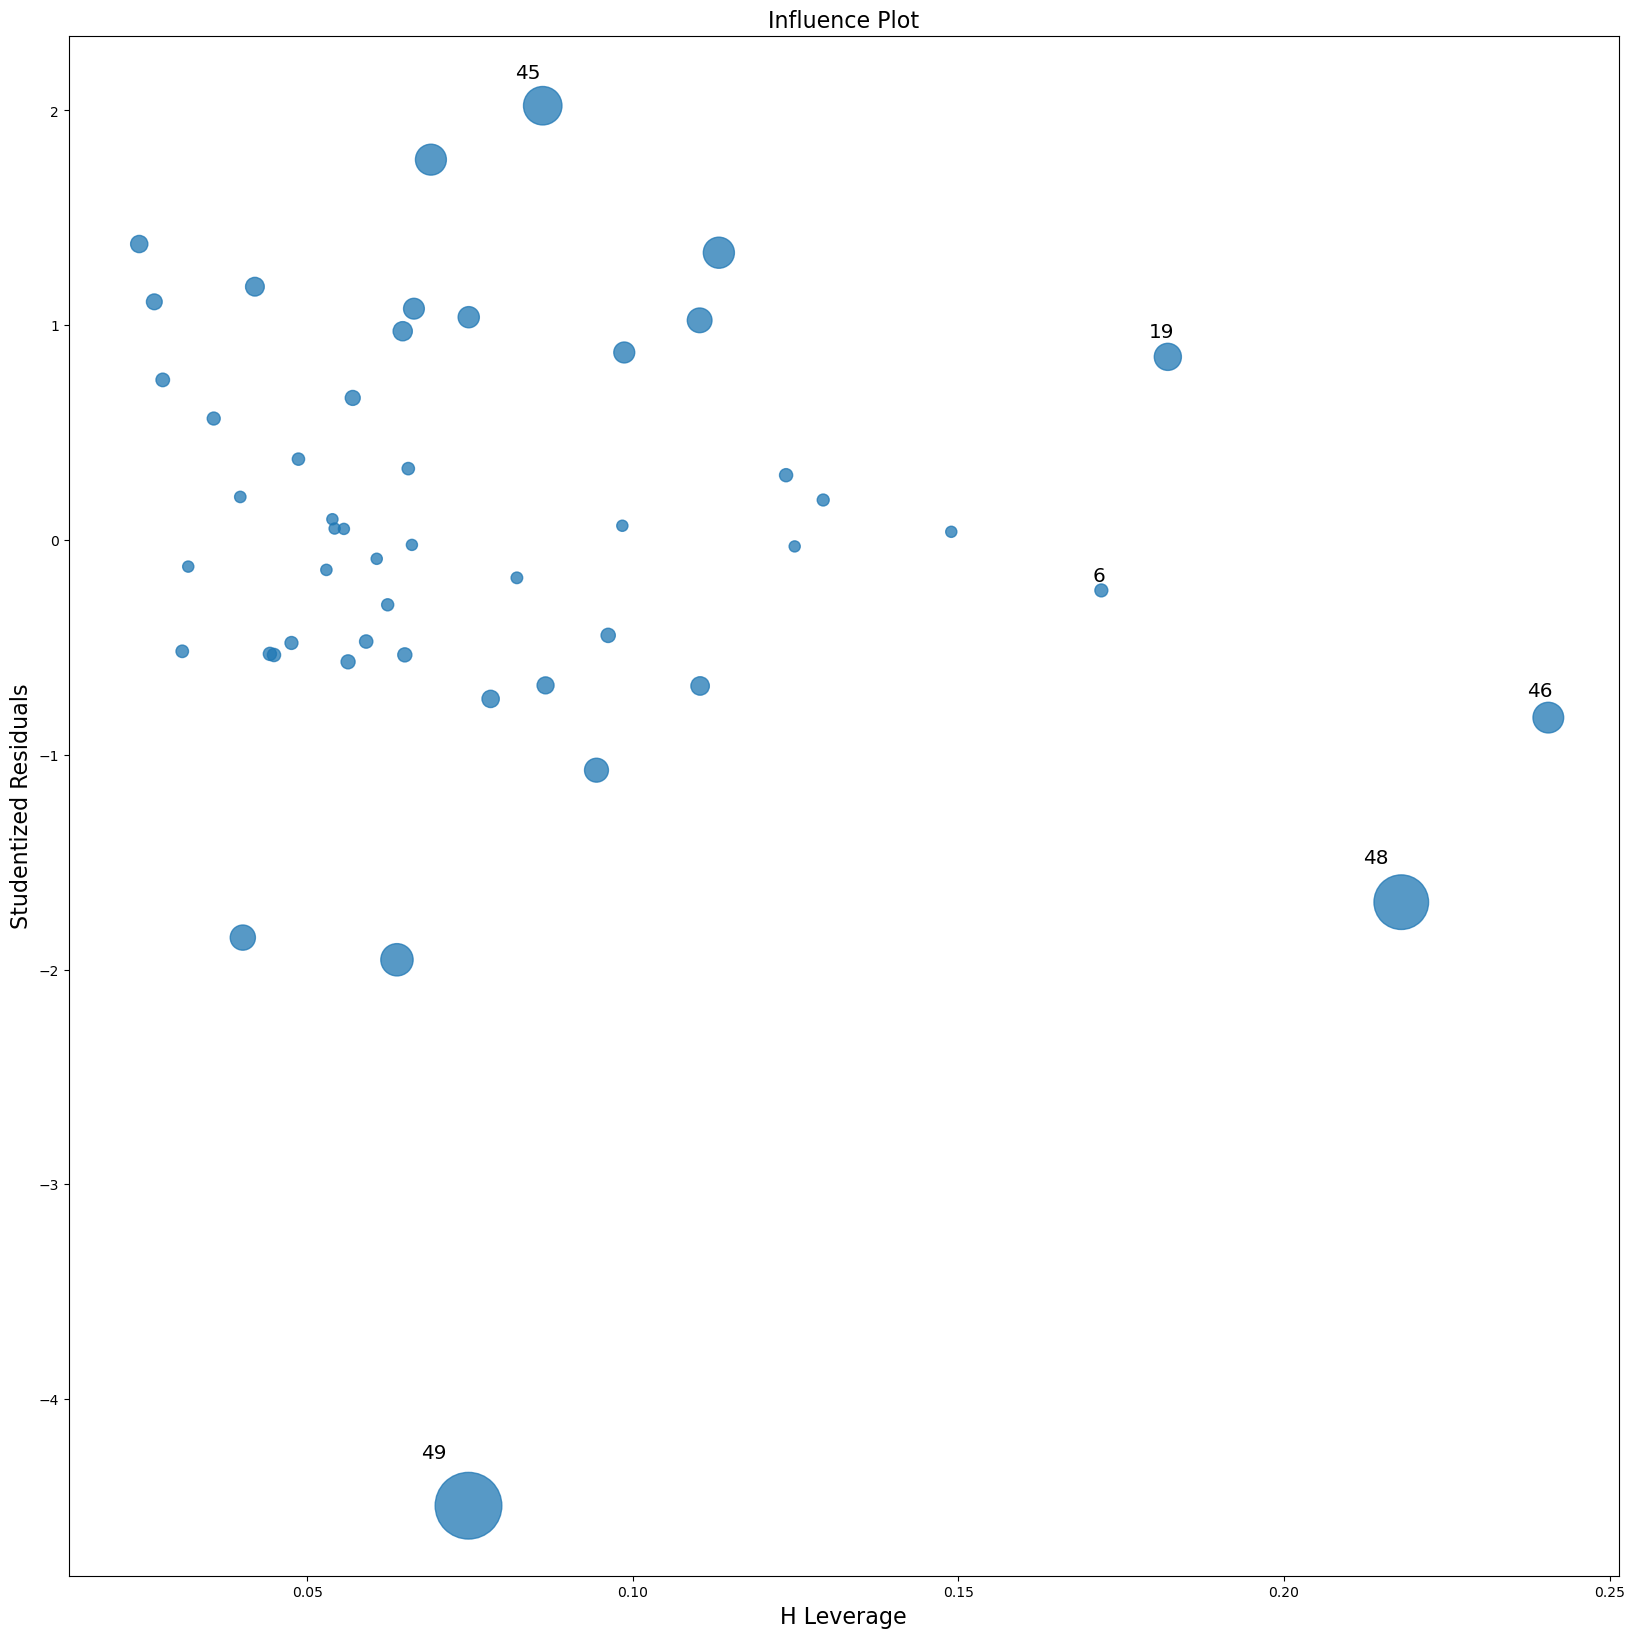

In [100]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)
plt.show()

In [101]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data_cleaned.shape[1]
n=data_cleaned.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [102]:
data_cleaned[data_cleaned.index.isin([49])] 

,RD_Spend,Administration,Marketing_Spend,Profit
49,-1.622362,-0.157226,-1.369985,-2.439313


In [103]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data_final=data_cleaned.drop(data_cleaned.index[[49]],axis=0).reset_index(drop=True)
data_final

,RD_Spend,Administration,Marketing_Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740
5,1.279800,-0.776239,1.254210,1.127250
6,1.340066,0.932147,-0.688150,1.105481
7,1.245057,0.871980,0.932186,1.096210
8,1.030369,0.986952,0.830887,1.007470
9,1.091819,-0.456640,0.776107,0.946022


## Model Deletion Diagnostics and Final Model

In [104]:
model2=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=data_final).fit()

In [105]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=data_final).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data_final=data_final.drop(data_final.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data_final
    else:
        final_model=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=data_final).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890554
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [106]:
final_model.rsquared 


0.9882757054424702

In [107]:
data_final

,RD_Spend,Administration,Marketing_Spend,Profit
0,1.504937,-1.079919,1.281528,1.357740
1,1.279800,-0.776239,1.254210,1.127250
2,1.245057,0.871980,0.932186,1.096210
3,1.030369,0.986952,0.830887,1.007470
4,1.091819,-0.456640,0.776107,0.946022
5,0.402078,0.510179,0.343957,0.558750
6,0.460720,0.855666,0.591017,0.334771
7,0.396725,-0.258465,0.692992,0.307116
8,0.055726,-0.269588,0.723926,0.161935
9,-0.136201,-0.562211,0.774349,-0.082169


# Model Predictions

In [108]:
# say New data for prediction is
new_data=pd.DataFrame({'RD_Spend':90000,"Administration":60000,"Marketing_Spend":80000},index=[0])
new_data

,RD_Spend,Administration,Marketing_Spend
0,90000,60000,80000


In [109]:
# Manual Prediction of Price
final_model.predict(new_data)

0    83624.749678
dtype: float64

In [110]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data_final)
pred_y

0     1.342743
1     1.166389
2     1.122184
3     0.940126
4     0.955105
5     0.365557
6     0.453425
7     0.397627
8     0.132481
9    -0.017127
10   -0.050192
11   -0.242623
12   -0.058917
13   -0.214277
14   -0.254079
15   -0.359811
16   -0.354369
17   -0.379796
18   -0.334783
19   -0.461868
20   -0.521943
21   -0.587470
22   -0.688987
23   -0.839191
24   -0.885750
25   -0.971781
26   -1.101146
dtype: float64

# table containing R^2 value for each prepared model

In [111]:
DF={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(DF)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
